Importing required libraries

In [107]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time 

Reading the .csv file

In [115]:
df = pd.read_csv('customersDataSet.csv')

Normalizing each feature to be on the same scale

In [116]:
n_df=(df-df.mean())/df.std()

Taking samples of N size

In [79]:
df_100 = n_df.sample(n=100)
df_200 = n_df.sample(n=200)
df_400 = n_df.sample(n=400)
df_800 = n_df.sample(n=800)
df_1600 = n_df.sample(n=1600)
df_3200 = n_df.sample(n=3200)
df_6400 = n_df.sample(n=6400)
df_12800 = n_df.sample(n=12800)
df_10k = n_df.sample(n=10000)
df_25k = n_df.sample(n=25000)
df_50k = n_df.sample(n=50000)

Random initialization of the Centroids. 

Complexity ==> O(k)

In [6]:
def initialize_centroids(k, data):
    ''' The inputs are :
        k : Number of desired clusters
        data : The dataframe of the customers
        We take random values from a unifrom distribution of [a = min. of dataFrame, b = max. of dataFrame, n_dims = no. of req. k-clusters]
    '''
    n_dims = data.shape[1] #number of columns --> 5 || 2
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

A function for calculating the sum of squared errors, which is the 'Euclidean Distance'.

Complexity --> O(1)

In [8]:
def calculate_error(a,b):
   # Given two Numpy Arrays, calculates the square root of the sum of squared errores.
    error = np.sqrt(np.sum((a-b)**2))

    return error

A function for assigning each customer to a specific cluster.

Complexity --> O(n x k)

In [10]:
def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_customers = data.shape[0] #Number of rows --> 10,000 | 25,000 | 50,000 | 75,000 | 100,000
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0] #Number of K-Clusters --> 3 || 5
    l = centroids.shape[1] #Number of values in the centroid --> 5 || 2


    for customer in range(n_customers):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :l], data.iloc[customer, :l])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0] #getting the index value of the min. error
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

# df['centroid'], df['error'] = assign_centroid(df.iloc[:,:5] ,centroids)
# df[['centroid', 'error']].head()

The K-mean function.


Complexity -->  O(K)  +  O(i x n x K)  +  O(n x K)  +  O(K)


Complexity -->  O(i x n x k)

In [18]:
def kmean(data, k):
    '''
    Given a dataset and number of clusters, it clusterizes the data. 
    data: a DataFrame with all information necessary
    k: number of clusters to create
    '''
    t1 = time.time()
    # Initialize centroids and error
    centroids = initialize_centroids(k, data) #O(K)
    error = []
    compr = True
    max_iter = 5
    i = 0

    while(compr and i<max_iter):  # O(i)
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids) # O(n x K)
        error.append(sum(iter_error))
        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)  # O(1)

        #Check if the error has decreased
        if(len(error)<2):   #O(1)
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1 

    #print(f"N: {data.shape[0]}  i: {i}")
    #print("Before: ", centroids)
    data['centroid'], iter_error = assign_centroid(data,centroids)  # O(n x K)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)  #O(K)
    #print("Centroids ", centroids)
    t2 = time.time()
    t = t2 - t1 
    
    return (data['centroid'], t, centroids)


Calling the K-Mean function with different values of N and K

First with K=3

N=100, 200, 400, 800, 1600, 3200, 6400, and 12,800

In [76]:
df_100['centroid'], t1, centroids1 =  kmean(df_100,3)
df_200['centroid'], t2, centroids2 =  kmean(df_200,3)
df_400['centroid'], t3, centroids3 =  kmean(df_400,3)
df_800['centroid'], t4, centroids4 =  kmean(df_800,3)
df_1600['centroid'], t5, centroids5 =  kmean(df_1600,3)
df_3200['centroid'], t6, centroids6 =  kmean(df_3200,3)
df_6400['centroid'], t7, centroids7 =  kmean(df_6400,3)
df_12800['centroid'], t8, centroids8 =  kmean(df_12800,3)

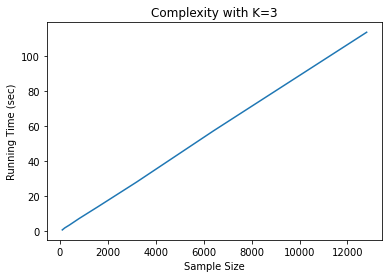

In [77]:
times = [t1, t2, t3, t4, t5, t6, t7, t8]
n_samples = [100 , 200, 400, 800, 1600, 3200, 6400, 12800] 
plt.plot(n_samples, times)
plt.title("Complexity with K=3")
plt.xlabel("Sample Size")
plt.ylabel("Running Time (sec)")
plt.show()

With K=5

N=100, 200, 400, 800, 1600, 3200, 6400, and 12,800

In [80]:
df_100['centroid'], t11, centroids1 =  kmean(df_100,5)
df_200['centroid'], t22, centroids2 =  kmean(df_200,5)
df_400['centroid'], t33, centroids3 =  kmean(df_400,5)
df_800['centroid'], t44, centroids4 =  kmean(df_800,5)
df_1600['centroid'], t55, centroids5 =  kmean(df_1600,5)
df_3200['centroid'], t66, centroids6 =  kmean(df_3200,5)
df_6400['centroid'], t77, centroids7 =  kmean(df_6400,5)
df_12800['centroid'], t88, centroids8 =  kmean(df_12800,5)

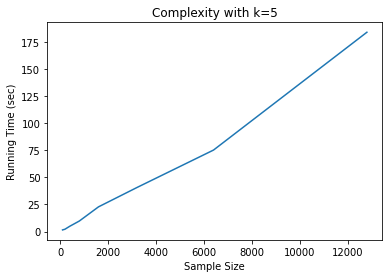

In [81]:
times_K5 = [t11, t22, t33, t44, t55, t66, t77, t88]
n_samples_K5 =  [100 , 200, 400, 800, 1600, 3200, 6400, 12800] 
plt.plot(n_samples_K5, times_K5)
plt.title("Complexity with k=5")
plt.xlabel("Sample Size")
plt.ylabel("Running Time (sec)")
plt.show()

Implementing the PCA Algorithm

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(n_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

Taking samples of N size after implementing PCA

In [90]:
p_df_10k = principalDf.sample(n=10000)

First with K=3

N=10k

In [91]:
p_df_10k['centroid'], __, c =  kmean(p_df_10k,3)

Text(0.5, 1.0, '3 Clusters')

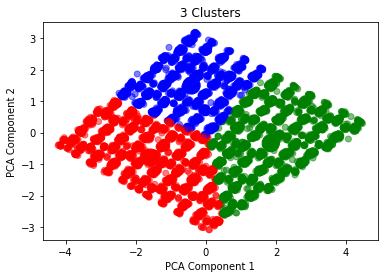

In [111]:
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'purple'}

plt.scatter(p_df_10k.iloc[:,0], p_df_10k.iloc[:,1],  marker = 'o', c = p_df_10k['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(c.iloc[:,0], c.iloc[:,1],  marker = 'o', s=300, c = c.index.map(lambda x: colors[x]))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("3 Clusters")


In [95]:
print("The S percentage: ", (p_df_10k['centroid'].value_counts()[0]/p_df_10k.shape[0])*100)
print("The M percentage: ", (p_df_10k['centroid'].value_counts()[1]/p_df_10k.shape[0])*100)
print("The L percentage: ", (p_df_10k['centroid'].value_counts()[2]/p_df_10k.shape[0])*100)

The S percentage:  35.38
The M percentage:  26.810000000000002
The L percentage:  37.81


With K=5

N=20k

In [121]:
p_df_20k = principalDf.sample(n=2000)
p_df_20k['centroid'], ___, cn =  kmean(p_df_20k,5)

Text(0.5, 1.0, '5 Clusters')

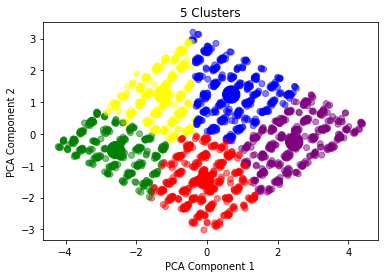

In [122]:
plt.scatter(p_df_20k.iloc[:,0], p_df_20k.iloc[:,1],  marker = 'o', c = p_df_20k['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(cn.iloc[:,0], cn.iloc[:,1],  marker = 'o', s=300, c = cn.index.map(lambda x: colors[x]))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("5 Clusters")

In [123]:
print("The XS percentage: ", (p_df_20k['centroid'].value_counts()[0]/p_df_20k.shape[0])*100)
print("The S percentage: ", (p_df_20k['centroid'].value_counts()[1]/p_df_20k.shape[0])*100)
print("The M percentage: ", (p_df_20k['centroid'].value_counts()[2]/p_df_20k.shape[0])*100)
print("The L percentage: ", (p_df_20k['centroid'].value_counts()[3]/p_df_20k.shape[0])*100)
print("The XL percentage: ", (p_df_20k['centroid'].value_counts()[4]/p_df_20k.shape[0])*100)

The XS percentage:  22.6
The S percentage:  21.95
The M percentage:  15.8
The L percentage:  17.95
The XL percentage:  21.7
